In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.2'

In [4]:
tf.keras.__version__

'2.8.0'

**Check if GPU is activated**

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Load in built data of keras**





In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
# mnist.load_data()

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
X_train_full.shape


(60000, 28, 28)

In [12]:
y_train_full.shape

(60000,)

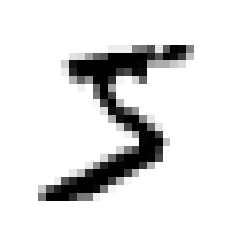

In [13]:
img = X_train_full[0]

plt.imshow(img, cmap='binary')
plt.axis('off')
plt.show()

In [14]:
y_train_full[0]

5

In [15]:
img.max(), img.min()

(255, 0)

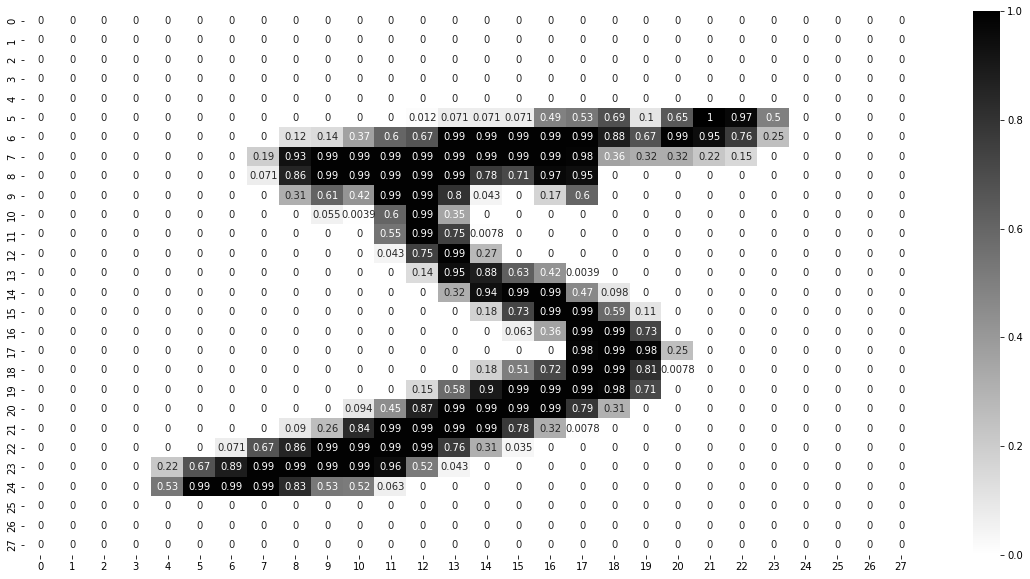

In [16]:
plt.figure(figsize = (20,10))
sns.heatmap(img/255, annot = True, cmap = 'binary')

In [17]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [18]:
Layers = [
    tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"),
    tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")
]


In [19]:
model_clf = tf.keras.models.Sequential(Layers)

In [20]:
model_clf.layers

In [21]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Params 

#first layer * second layer + bias

784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [23]:
model_clf.layers[1].name

'hiddenLayer1'

In [24]:
weigths, biases = model_clf.layers[1].get_weights()

In [25]:
weigths.shape

(784, 300)

In [26]:
biases.shape

(300,)

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"    #------ Used for classification problems
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [28]:
model_clf.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

By default batch_size = 32 

Train data = 55000 data points

So total samples in every epoch will be **55000/32 = 1719** (Trainable data points in fit below)

In [29]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6254 - accuracy: 0.8364 - val_loss: 0.3150 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2956 - accuracy: 0.9159 - val_loss: 0.2520 - val_accuracy: 0.9310
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2416 - accuracy: 0.9309 - val_loss: 0.2139 - val_accuracy: 0.9398
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2045 - accuracy: 0.9415 - val_loss: 0.1812 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1771 - accuracy: 0.9499 - val_loss: 0.1634 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1557 - accuracy: 0.9557 - val_loss: 0.1450 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1383 - accuracy: 0.9610 - val_loss: 0.1352 - val_accuracy:

In [30]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.625386,0.836364,0.315030,0.9130
1,0.295626,0.915891,0.251953,0.9310
2,0.241557,0.930927,0.213875,0.9398
3,0.204456,0.941473,0.181154,0.9508
4,0.177098,0.949945,0.163362,0.9566
5,0.155670,0.955727,0.144962,0.9604
6,0.138321,0.961018,0.135227,0.9634
7,0.124418,0.965127,0.123771,0.9674
8,0.113176,0.968382,0.116257,0.9684
9,0.103297,0.970800,0.109028,0.9706


In [32]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9776


[0.06670600920915604, 0.9775999784469604]

In [33]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

In [34]:
y_prob.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
Y_pred = np.argmax(y_prob, axis = -1)
Y_pred

array([7, 2, 1])

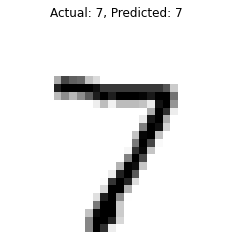

--------------------------------------------------------------------------------


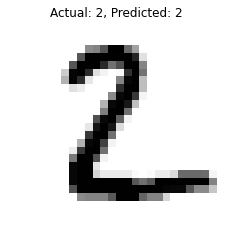

--------------------------------------------------------------------------------


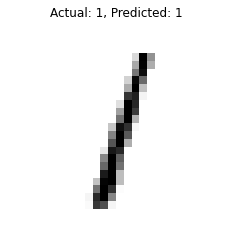

--------------------------------------------------------------------------------


In [37]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap = "binary",)
  plt.title(f"Actual: {actual}, Predicted: {pred}")
  plt.axis("off")
  plt.show()
  print('----'*20)